 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd                 #Import pandas lib
import numpy as np                  #Import numpy lib
import datetime as dt               #Import datetime lib
from pathlib import Path            #Import pathlib lib

%matplotlib inline                 

#Set resource directory
dir = "C:/GitBash/PortfolioAnalysis/Starter_Code/Resources"

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
#----------------------------------------------------------------------------------------
# Read whale_returns_file into data frames with Index by 'Date' column, parse dates and 
# infer date formats from first element. In this case , the format is YYYY-MM-DD. Then 
# clean the data
#----------------------------------------------------------------------------------------
whale_returns_file = Path.home().joinpath(dir, 'whale_returns.csv')  #whale return file
whale_returns = pd.read_csv(whale_returns_file, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True, inplace=True)            #Sort the dataframe in ascending order
whale_returns.head() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
print(whale_returns.index.dtype)          #Check to see if the index key in the correct data type - datetime

datetime64[ns]


In [4]:
whale_returns.dtypes                      #Check the schema for proper data type

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [5]:
# Count nulls
whale_returns.isnull().sum()                         #Total number nulls in the file

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
#Print rows with nulls
print(whale_returns[whale_returns.isnull().any(axis = 1)])    

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [7]:
# Drop nulls
whale_returns.dropna(inplace=True)                   #Remove columns with null values
whale_returns.isnull().sum()                         #Check for Total number of nulls

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
#--------------------------------------------------------------------------------------------
# Read algo_returns_file into data frames with Index by 'Date' column, parse dates and infer
# date formats from first element. In this case , the format is YYYY-MM-DD. The format
#is taken from file whale_returns_file. Then clean the data
#--------------------------------------------------------------------------------------------
algo_return_file = Path.home().joinpath(dir, 'algo_returns.csv')  #algo return file
algo_return = pd.read_csv(algo_return_file, index_col="Date", parse_dates=['Date'], infer_datetime_format=True)
algo_return.sort_index(ascending=True, inplace=True)              #Sort the dataframe in ascending order
algo_return.head(20)                                             #Check the dataframe data

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [9]:
print(algo_return.index.dtype)          #Check to see if the index key in the correct data type - datetime

datetime64[ns]


In [10]:
algo_return.dtypes                      #Check the schema for proper data type 

Algo 1    float64
Algo 2    float64
dtype: object

In [11]:
# Count nulls
algo_return.isnull().sum()                          #Total number nulls in the file

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
#Print rows with nulls
print(algo_return[algo_return.isnull().any(axis = 1)])    

              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
2014-06-04 -0.001838     NaN


In [13]:
# Drop nulls
algo_return.dropna(inplace=True)                    #Remove columns with null values
algo_return.isnull().sum()                          #Check for nulls in the file

Algo 1    0
Algo 2    0
dtype: int64

In [14]:
algo_return.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [15]:
#--------------------------------------------------------------------------------------------
# Reading S&P TSX 60 Closing Prices. Read sp_tsx_history_file into data frames with Index by 'Date' column, parse dates and infer
# date formats from first element. In this case , the format is YYYY-MM-DD. The format
#is taken from file whale_returns_file. Then clean the data
#--------------------------------------------------------------------------------------------
sp_tsx_history_file = Path.home().joinpath(dir, 'sp_tsx_history.csv')      #SP, TSX history file
sp_tsx_History = pd.read_csv(sp_tsx_history_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_History.sort_index(ascending = True, inplace=True)                #Sort the dataframe in ascending order
sp_tsx_History.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [16]:
print(sp_tsx_History.index.dtype)          #Check to see if the index key in the correct data type - datetime

datetime64[ns]


In [17]:
# Check Data Typesof schema
sp_tsx_History.dtypes

Close    object
dtype: object

In [18]:
# Fix Data Types
sp_tsx_History['Close'] = sp_tsx_History['Close'].str.replace('$','', regex=True)    #Remove '$' from column 'Close'
sp_tsx_History['Close'] = sp_tsx_History['Close'].str.replace(',','', regex=True)    #Remove ',' from column 'Close
sp_tsx_History["Close"] = sp_tsx_History["Close"].astype("float")        #Convert column 'Close' to float
sp_tsx_History.sort_index(ascending = True, inplace=True)                #Sort the dataframe in ascending order
sp_tsx_History.dtypes                                                    # Check Data Typesof schema

Close    float64
dtype: object

In [19]:
#Check the data for any abnomalyties
sp_tsx_History.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [20]:
# Calculate Daily Returns
sp_tsx_History = sp_tsx_History.pct_change()
sp_tsx_History.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [21]:
#Check for nulls values
sp_tsx_History.isnull().sum()

Close    1
dtype: int64

In [22]:
#Data cleaning
sp_tsx_History.dropna(inplace=True)  #Remove columns with null values
sp_tsx_History.isnull().sum()        #Check for null values after dropping those values

Close    0
dtype: int64

In [23]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_History.rename(columns = {"Close":"S&P TSX 60"}, inplace = True)
sp_tsx_History.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [24]:
# Join Whale, Algorithmic, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
single_df = pd.concat([whale_returns, algo_return, sp_tsx_History], axis="columns", join="inner")
single_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [25]:
single_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX 60                     0
dtype: int64

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

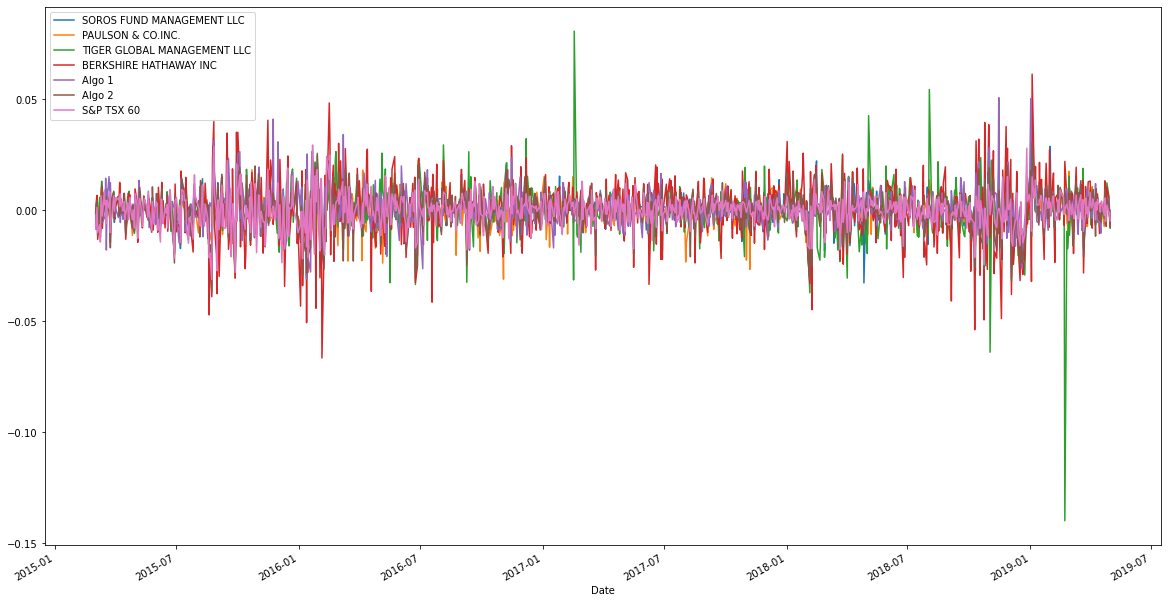

In [26]:
# Plot daily returns of all portfolios
single_df.plot(figsize = (20,11))

#### Calculate and Plot cumulative returns.

In [27]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + single_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

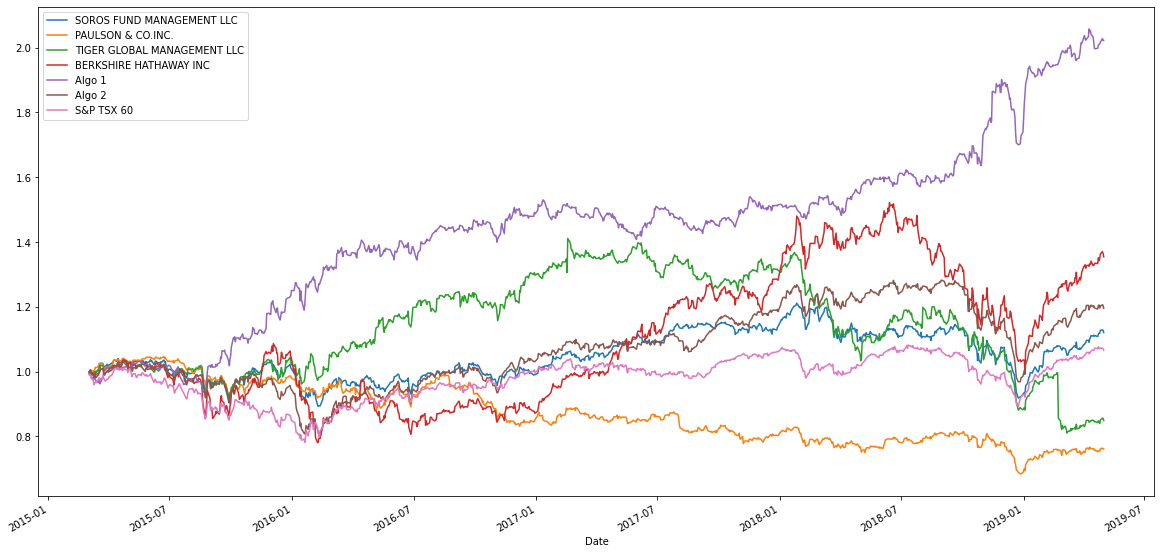

In [28]:
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

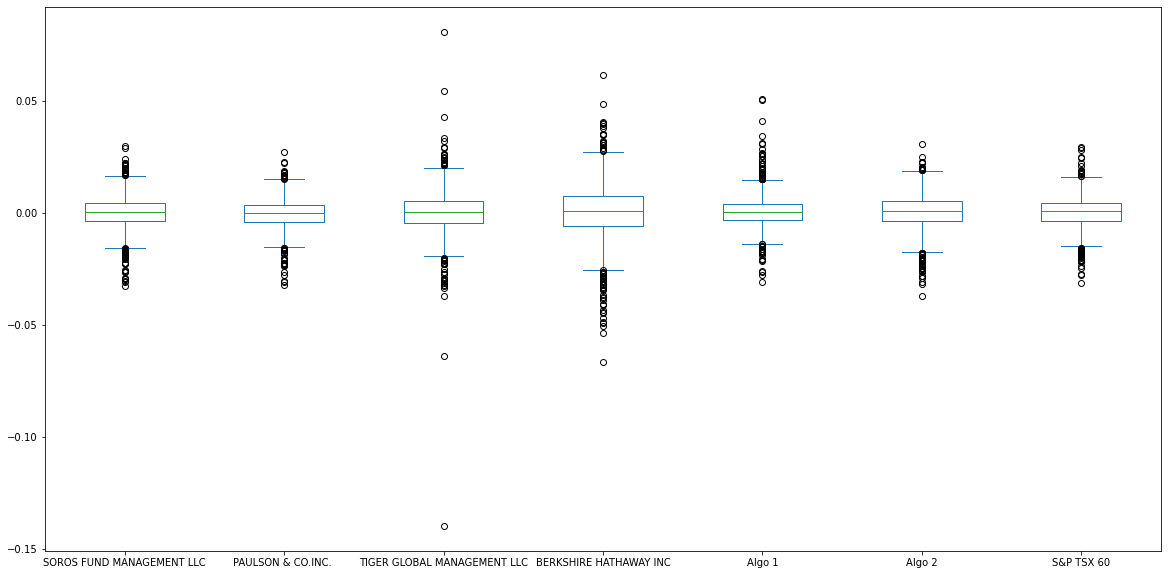

In [29]:
# Box plot to visually show risk
single_df.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios and name the column to std
daily_std = pd.DataFrame(single_df.std()).rename(columns = {0:"std"})
daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P TSX 60,0.007034


By Visual observation we can see that there are 5 Portfolios are riskier than the S&P 500. 
They are SOROS Fund Management LLC(0.007828), Tiger Global Management(0.010883), Berkshire Hathaway(0.012826), 
Algo 1(0.007589) and Algo 2(0.008326)

### Determine which portfolios are riskier than the S&P TSX 60

In [31]:
# Calculate  the daily standard deviation of S&P TSX 60
pd.DataFrame(sp_tsx_History.std()).rename(columns = {0:"std"})

# Determine which portfolios are riskier than the S&P TSX 60
higher_std = daily_std[daily_std["std"] > daily_std.loc["S&P TSX 60", "std"]]

In [32]:
higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [33]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P TSX 60,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

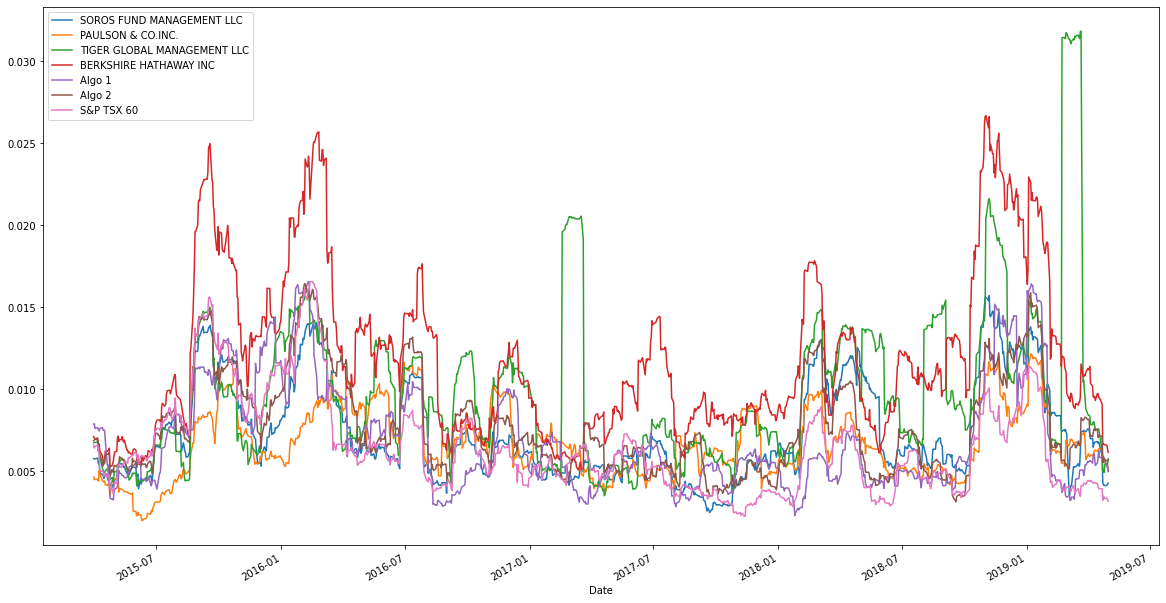

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = single_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,11))

### Calculate and plot the correlation

In [35]:
# Calculate the correlation
dialy_corr = single_df.corr()

# Display de correlation matrix
dialy_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

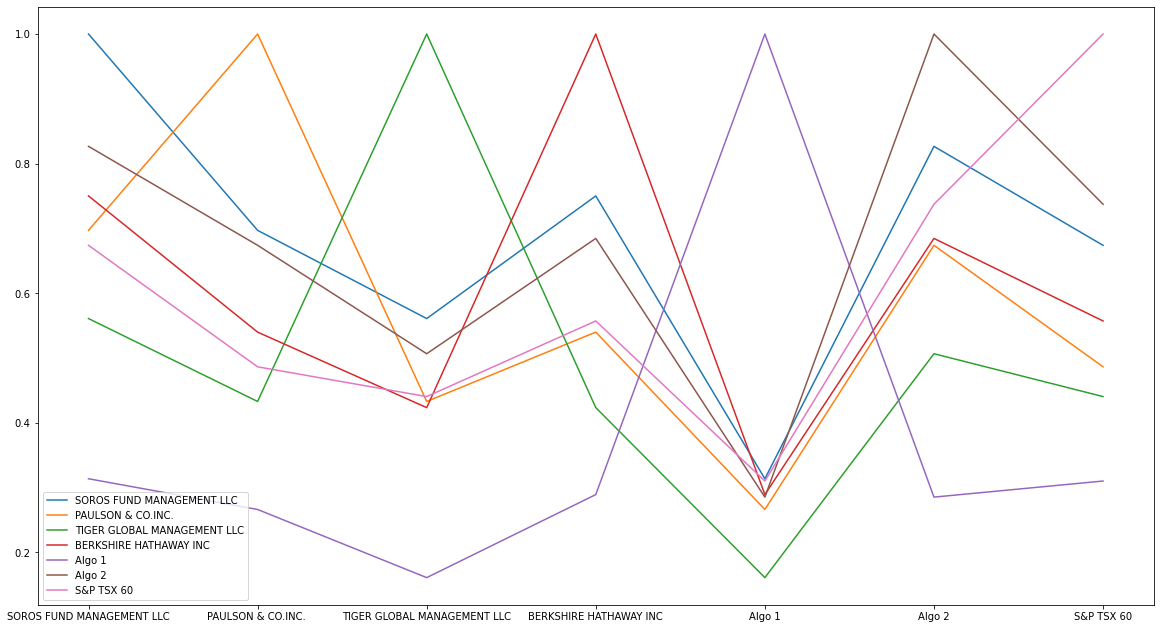

In [36]:
dialy_corr.plot(figsize=(20,11))

In [37]:
sp_corr = pd.DataFrame(single_df.corr()).loc[:,"S&P TSX 60"]
sp_corr[sp_corr==sp_corr[sp_corr<1].max()]

Algo 2    0.73737
Name: S&P TSX 60, dtype: float64

In [38]:
print("Algo 2 best mimic SP500 since it has the best correlation to S&P TSX 60, as visualized in chart below.")

Algo 2 best mimic SP500 since it has the best correlation to S&P TSX 60, as visualized in chart below.


<AxesSubplot:xlabel='S&P TSX 60', ylabel='Algo 2'>

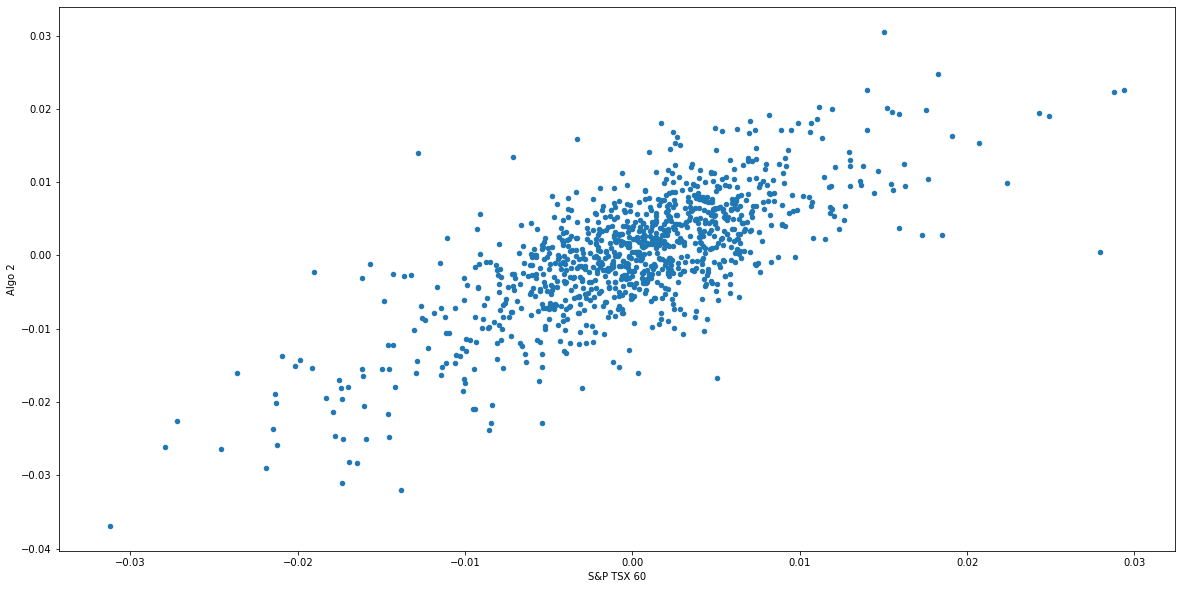

In [39]:
single_df.plot(kind="scatter", y = "Algo 2", x = "S&P TSX 60", figsize = (20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH'}, xlabel='Date'>

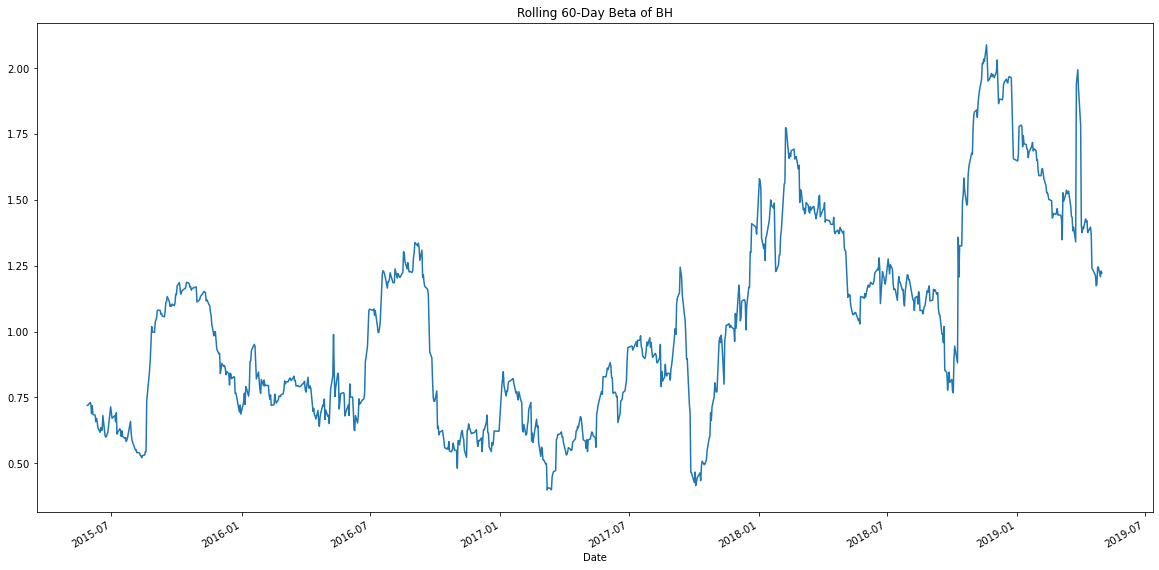

In [40]:
# Calculate covariance of a single portfolio
rolling_covariance = single_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(single_df["S&P TSX 60"])

# Calculate variance of S&P TSX
rolling_variance = single_df["S&P TSX 60"].rolling(window=60).var()
                  
# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')
                  

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

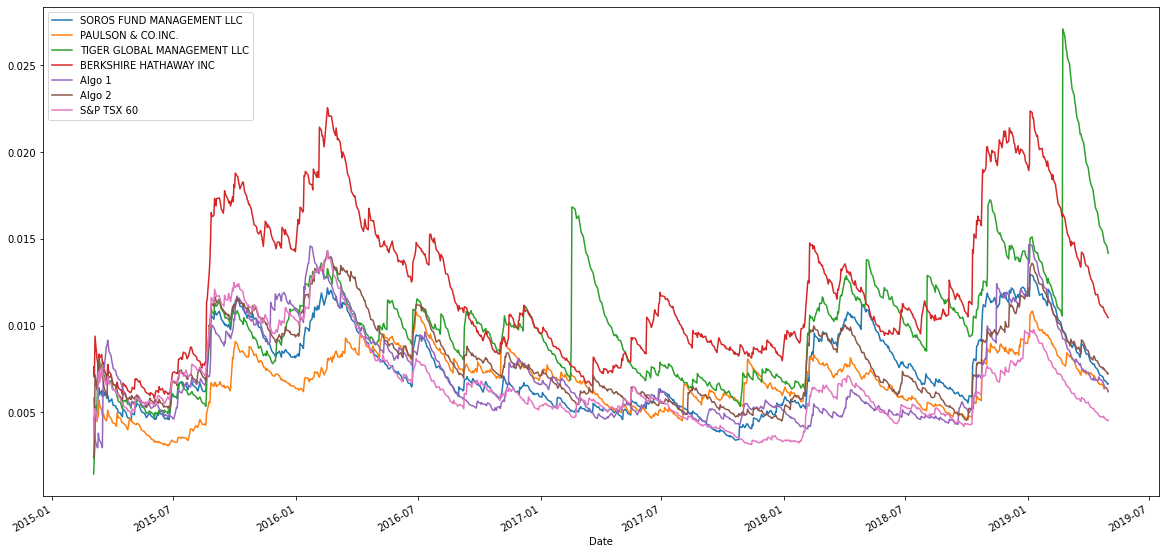

In [41]:
# Use `ewm` to calculate the rolling window
daily_ewm = single_df.ewm(halflife=21).std()
daily_ewm.plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
annualized_sharpe_ratio = (single_df.mean() * 252) / (single_df.std() * np.sqrt(252))
annualized_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ration'}>

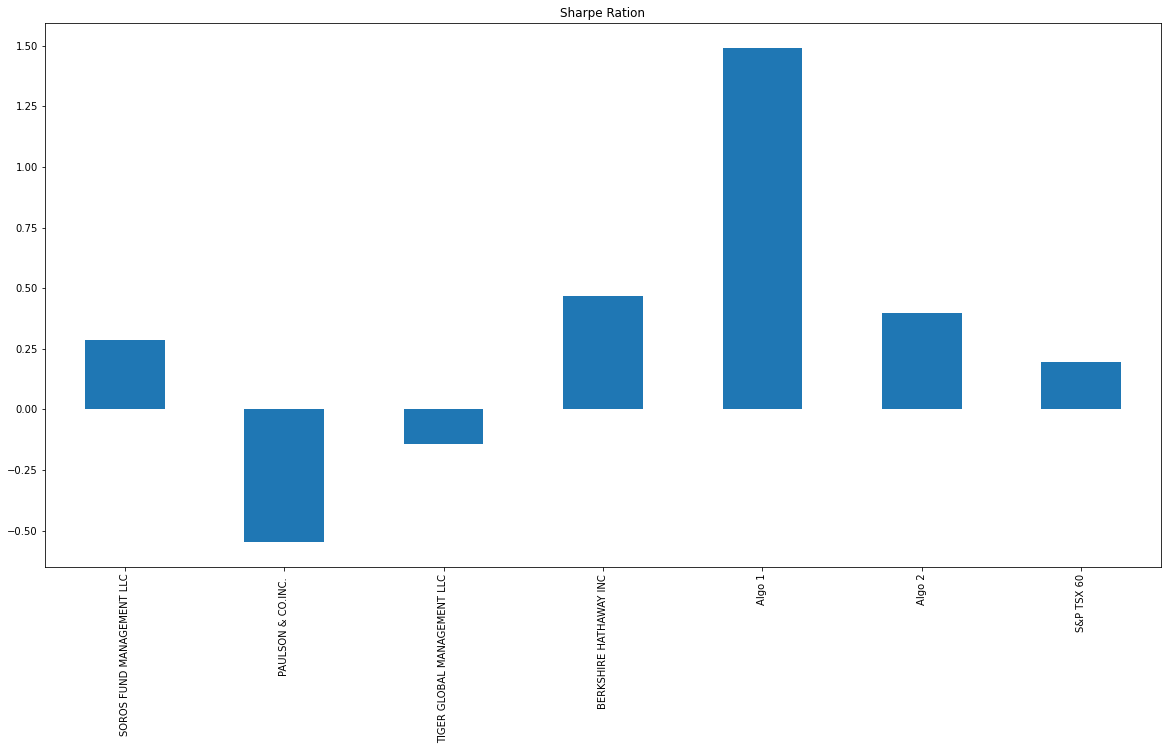

In [43]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot(kind = "bar", title = "Sharpe Ration", figsize = (20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 outperformed S&P TSX 60 and Whales while Algo 2 did beter than S&P TSX 60 but BHI is much better tha Algo 2.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [45]:
# Reading data from 1st stock - Tesla
tesla_file = Path.home().joinpath(dir, 'Tesla.csv')  #whale return file
tesla_stocks = pd.read_csv(tesla_file, index_col="Date", parse_dates=True, infer_datetime_format=True)
tesla_stocks.sort_index(ascending = True, inplace=True)            #Sort the dataframe in ascending order
tesla_stocks.rename(columns = {"Close":"Price"}, inplace = True)
tesla_stocks.dropna(inplace = True)
tesla_stocks.head()
#print(tesla_stocks.index.dtype)
#tesla_stocks.dtypes

,Price
Date,
2015-01-02,43.86
2015-01-05,42.02
2015-01-06,42.26
2015-01-07,42.19
2015-01-08,42.12


In [46]:
# Reading data from 2nd stock - GOOGLE
google_file = Path.home().joinpath(dir, 'Google.csv')  #whale return file
google_stocks = pd.read_csv(google_file, index_col="Date", parse_dates=True, infer_datetime_format=True)
google_stocks.sort_index(ascending = True, inplace=True)            #Sort the dataframe in ascending order
google_stocks.rename(columns = {"Close":"Price"}, inplace = True)
google_stocks['Price'] = google_stocks['Price'].astype(float) 
google_stocks.dropna(inplace = True)
google_stocks.head()
#google_stocks.dtypes
#print(google_stocks.index.dtype)

,Price
Date,
2015-01-02,523.37
2015-01-05,512.46
2015-01-06,500.59
2015-01-07,499.73
2015-01-08,501.30


In [47]:
# Reading data from 3rd stock - IBM
ibm_file = Path.home().joinpath(dir, 'IBM.csv')  
ibm_stocks = pd.read_csv(ibm_file, index_col="Date", parse_dates=True, infer_datetime_format=True)
ibm_stocks.sort_index(ascending = True, inplace=True)            
ibm_stocks.rename(columns = {"Close":"Price"}, inplace = True)
ibm_stocks.dropna(inplace = True)
ibm_stocks.head()
#print(ibm_stocks.index.dtype)
#ibm_stocks.dtypes

,Price
Date,
2015-01-02,154.79
2015-01-05,152.36
2015-01-06,149.07
2015-01-07,148.10
2015-01-08,151.32


In [48]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([tesla_stocks, google_stocks, ibm_stocks], axis="columns", join="inner")
all_stocks.isnull().sum()
all_stocks.head()

,Price,Price,Price
Date,,,
2015-01-02,43.86,523.37,154.79
2015-01-05,42.02,512.46,152.36
2015-01-06,42.26,500.59,149.07
2015-01-07,42.19,499.73,148.10
2015-01-08,42.12,501.30,151.32


In [49]:
# Reset Date index
all_stocks.index = all_stocks.index.normalize()
all_stocks

,Price,Price,Price
Date,,,
2015-01-02,43.86,523.37,154.79
2015-01-05,42.02,512.46,152.36
2015-01-06,42.26,500.59,149.07
2015-01-07,42.19,499.73,148.10
2015-01-08,42.12,501.30,151.32
...,...,...,...
2019-12-23,83.84,1348.84,129.47
2019-12-24,85.05,1343.56,128.93
2019-12-26,86.19,1360.40,128.86


In [50]:
# Reorganize portfolio data by having a column per symbol
all_stocks.columns = ['Tesla', 'Google', 'IBM']
all_stocks.head()

,Tesla,Google,IBM
Date,,,
2015-01-02,43.86,523.37,154.79
2015-01-05,42.02,512.46,152.36
2015-01-06,42.26,500.59,149.07
2015-01-07,42.19,499.73,148.10
2015-01-08,42.12,501.30,151.32


In [51]:
# Calculate daily returns
daily_returns = all_stocks.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

,Tesla,Google,IBM
Date,,,
2015-01-05,-0.041952,-0.020846,-0.015699
2015-01-06,0.005712,-0.023163,-0.021594
2015-01-07,-0.001656,-0.001718,-0.006507
2015-01-08,-0.001659,0.003142,0.021742
2015-01-09,-0.018756,-0.012946,0.004362


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
#weighted_returns = (daily_returns["Tesla"] + daily_returns["Lucid"] + daily_returns["Nio"])/3
weighted_returns = pd.DataFrame(daily_returns.dot(weights))
weighted_returns.rename(columns = {0:"Weighted Rtn"}, inplace = True )

# Display sample data
weighted_returns.head()

,Weighted Rtn
Date,
2015-01-05,-0.026165
2015-01-06,-0.013015
2015-01-07,-0.003294
2015-01-08,0.007742
2015-01-09,-0.009114


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Join your returns DataFrame to the original returns DataFrame
all_porfolios = pd.concat([weighted_returns, single_df], axis=1, join="inner")
all_porfolios

,Weighted Rtn,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2015-03-03,0.006208,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.001349,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.001851,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.021183,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000304,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...,...
2019-04-25,-0.015366,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.012558,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.012040,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_porfolios.dropna(inplace=True)
all_porfolios

,Weighted Rtn,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2015-03-03,0.006208,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.001349,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.001851,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.021183,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000304,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...,...
2019-04-25,-0.015366,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.012558,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.012040,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized `std`
porfolios_annualized_std = all_porfolios.std()* np.sqrt(252)
porfolios_annualized_std

Weighted Rtn                   0.221881
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

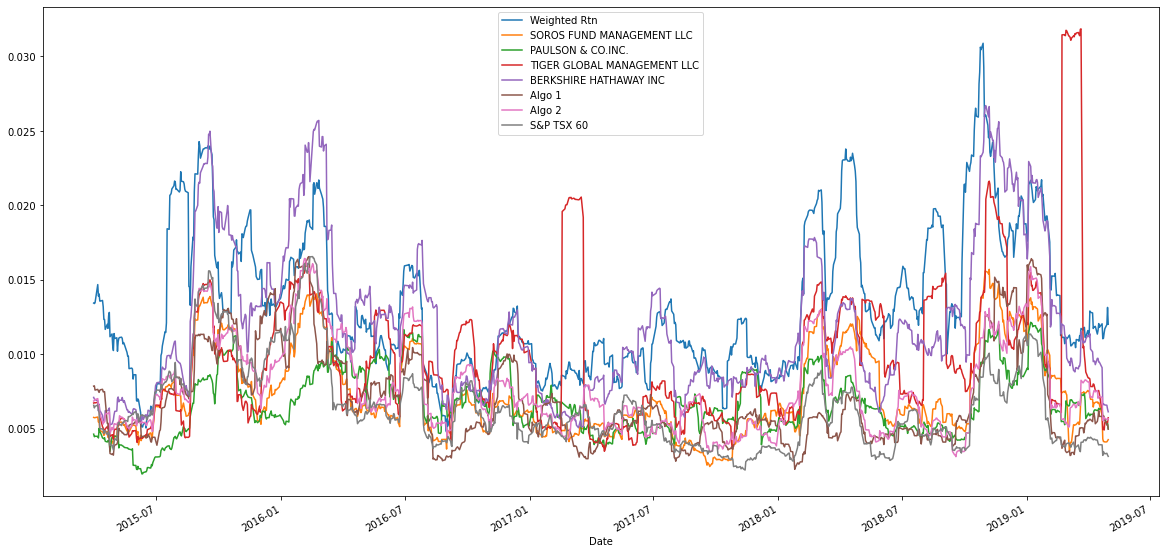

In [56]:
# Calculate rolling standard deviation
porfolio_rolling_std = all_porfolios.rolling(window=21).std()

# Plot rolling standard deviation
porfolio_rolling_std.plot(figsize = (20,10))

### Calculate and plot the correlation

In [57]:
# Calculate and plot the correlation
all_porfolios_corr = all_porfolios.corr
all_porfolios_corr

<bound method DataFrame.corr of             Weighted Rtn  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                      
2015-03-03      0.006208                  -0.001266           -0.004981   
2015-03-04      0.001349                   0.002230            0.003241   
2015-03-05      0.001851                   0.004016            0.004076   
2015-03-06     -0.021183                  -0.007905           -0.003574   
2015-03-09      0.000304                   0.000582            0.004225   
...                  ...                        ...                 ...   
2019-04-25     -0.015366                  -0.000285           -0.001291   
2019-04-26     -0.012558                   0.008149            0.009162   
2019-04-29      0.012040                   0.001254            0.002719   
2019-04-30     -0.026541                  -0.001295           -0.002211   
2019-05-01     -0.011588                  -0.005847           -0.001

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Weighted Rtn'}, xlabel='Date'>

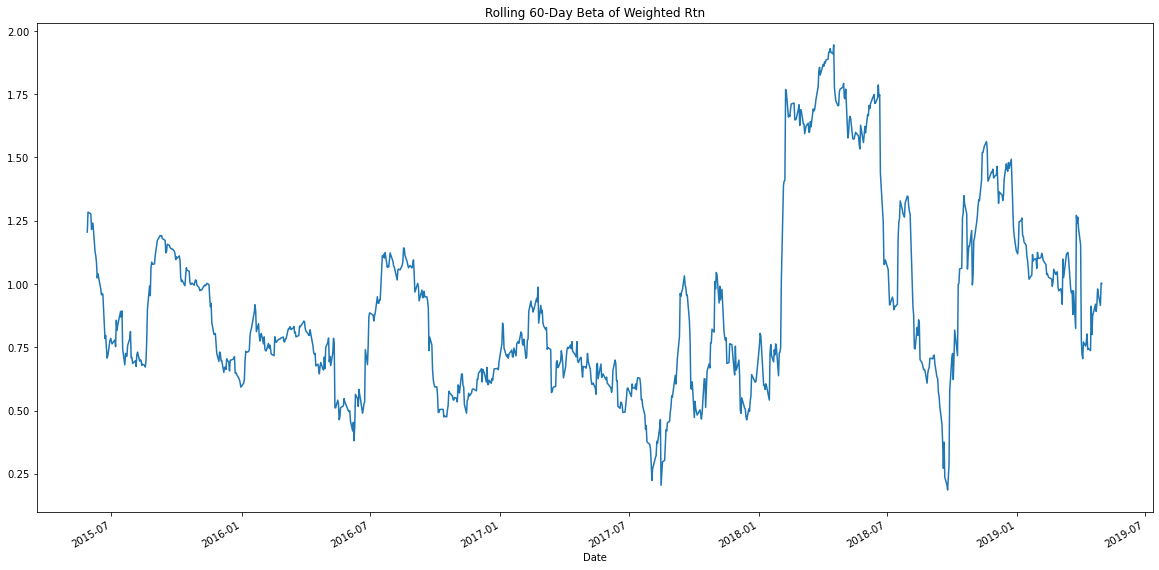

In [58]:
# Calculate and plot Beta
covariance = all_porfolios['Weighted Rtn'].rolling(window=60).cov(all_porfolios["S&P TSX 60"])
variance = all_porfolios["S&P TSX 60"].rolling(window=60).var()
beta = covariance / variance
beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Weighted Rtn')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (all_porfolios.mean() * 252) / (all_porfolios.std() * np.sqrt(252))
sharpe_ratio

Weighted Rtn                   0.479360
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

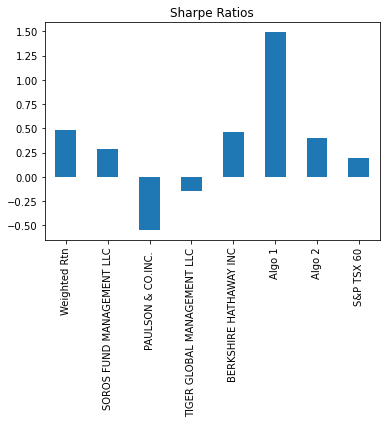

In [60]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios" )

### How does your portfolio do?

Write your answer here!

My portfolio, Weighted_Rtn, did okay, but Algo 1 did the best as per bar graph.